In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pickle
import tqdm


In [2]:
sns.set_context("talk")
sns.set_style("ticks")

# Number of SNPs with low pvals and clumped

In [3]:
snps_pval = np.loadtxt("../results/summary/counts/num_snps_p_0.01.txt")
snps_pval_clumped = np.loadtxt("../results/summary/counts/num_snps_emp_all_sims.txt")

In [4]:
snps_pval

array([13018.,  9375., 23747., 20682.,  7698., 12274., 21849.,  8187.,
       14267., 13050., 19735., 13316., 12556.,  9850., 16851., 16502.,
       21015., 20800., 10923., 15424., 20201., 19287.,  9307., 10480.,
       14113.,  9093., 25256., 13589.,  4462., 12124., 15516., 17868.,
       15401., 16972., 18544., 19539., 10823., 17311., 22541., 12157.,
       23753., 11470., 13746., 12921., 21413.,  9936., 11873.,  9799.,
       16736., 16546.])

In [5]:
snps_pval_clumped

array([1652., 1463., 1669., 1619., 1468., 1556., 1921., 1236., 1598.,
       1502., 1858., 1601., 1493., 1605., 1512., 1694., 1708., 1517.,
       1568., 1708., 1457., 1761., 1437., 1695., 1492., 1228., 1801.,
       1819., 1023., 1776., 1949., 1612., 1548., 1589., 1513., 1814.,
       1380., 1824., 1610., 1532., 1734., 1717., 1702., 1546., 1752.,
       1493., 1555., 1389., 1529., 1597.])

In [6]:
sim_snp_counts = pd.DataFrame({"pval":snps_pval,"clumped":snps_pval_clumped}).astype(int)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(10,5))
sns.violinplot(data=sim_snp_counts,y="pval",ax=ax1,cut=0)
sns.violinplot(data=sim_snp_counts,y="clumped",color="orange",ax=ax2,cut=0)

for ax in [ax1,ax2]:
    ax.set_ylabel("# of SNPs")
ax1.set_xlabel("p-value < 0.01")
ax2.set_xlabel("p-value < 0.01 AND $r^2$ < 0.2\n(in empirical PRS)")
    
f.suptitle("Distribution Across 50 Simulations")
sns.despine()
plt.tight_layout(pad=2)
plt.savefig("/Users/taylorcavazos/Desktop/summary_num_snps.pdf",type="pdf")
plt.show()

# Summarizing movement between emprirical and true prs

In [7]:
sns.set_context("talk")
sns.set_style("whitegrid")

In [8]:
files = glob.glob("../results/emp_prs_test/outputs/*")

In [9]:
# order_df = pd.DataFrame(columns=["q_1","q_5","q_9"])
data_eur_only = {}
data_eur_low = {}
for file in files:
    sim = file.split("_")[-1].split(".")[0]
    df = pd.read_csv(file,sep="\t")
    if "ALL" in file: 
        data_eur_only[sim] = df
    else: 
        data_eur_low[sim] = df
#     low_q, mid_q, high_q = df.loc[0,"difference"], df.loc[4,"difference"], df.loc[8,"difference"]
#     order_df.loc[sim,:] = [low_q,mid_q,high_q]

In [10]:
def plot_shift(ax,sim,data,color,title,linestyle="-"):
    sf = sns.lineplot(x="true",y="difference",data=data[sim],markers=True,marker="o",ax=ax,color=color)
    ax.lines[0].set_linestyle(linestyle)
    ax.fill_between(x = data[sim]["true"],y1 = data[sim]["ci_lower"], y2 = data[sim]["ci_upper"], alpha=0.2,color=color)
    ax.hlines(0,data[sim]["true"].min(),data[sim]["true"].max(),color="gray",linestyles=":")
    ax.vlines(data[sim].loc[4,"true"],-2,2,color="gray",linestyles=":")
    ax.set_xlabel("Deciles for True PRS",fontsize=16)
    ax.set_ylabel("Decile Differences:\nTrue PRS - Empirical PRS",fontsize=16)
    ax.set_title(title,fontsize=18)
    return

In [11]:
color_pallette = sns.color_palette("rainbow",n_colors=50)

/Users/taylorcavazos/anaconda3/envs/localAnc/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


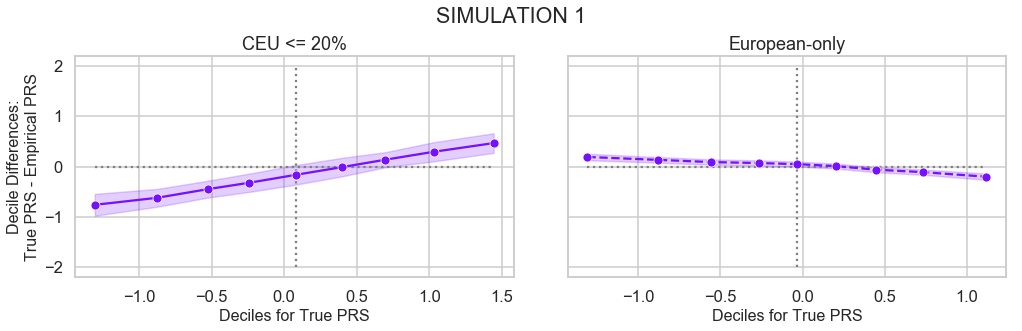

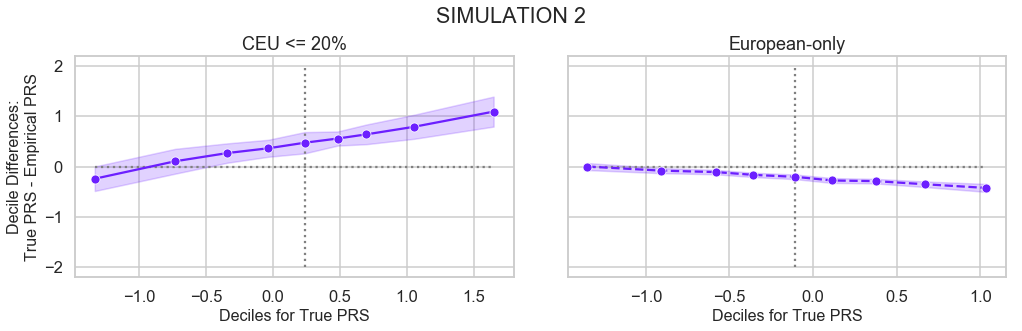

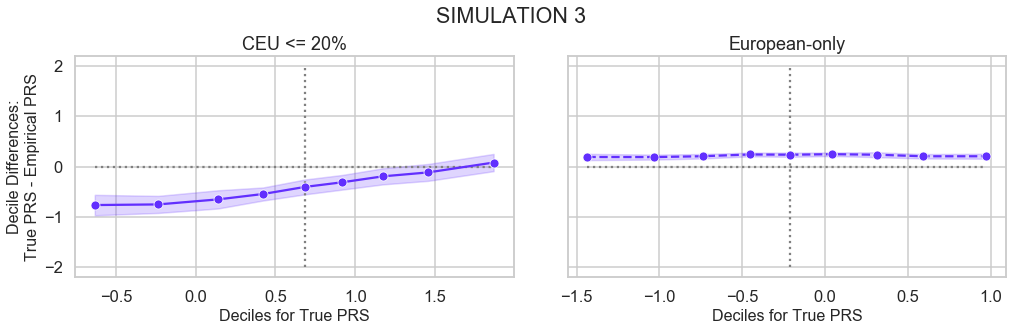

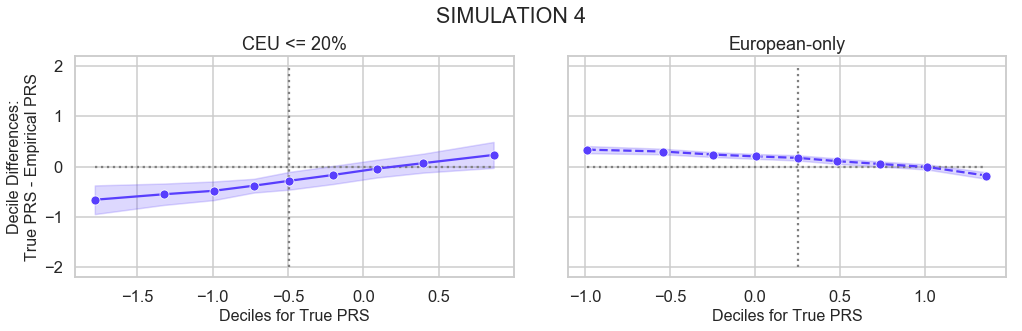

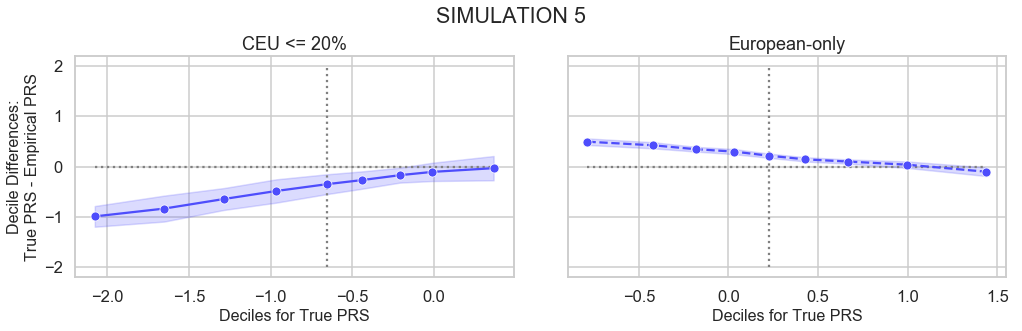

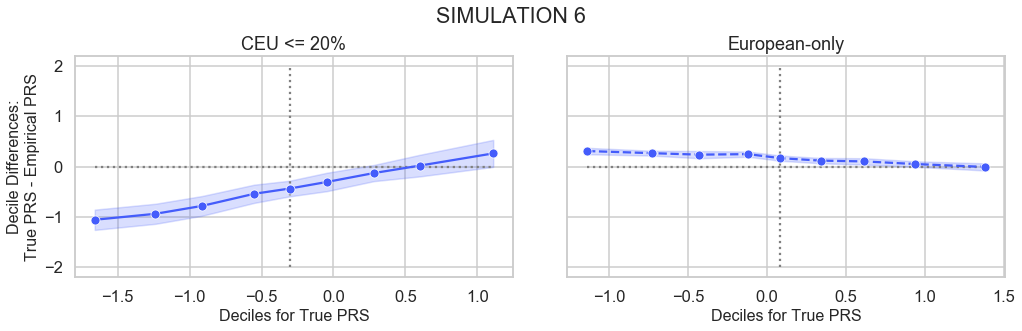

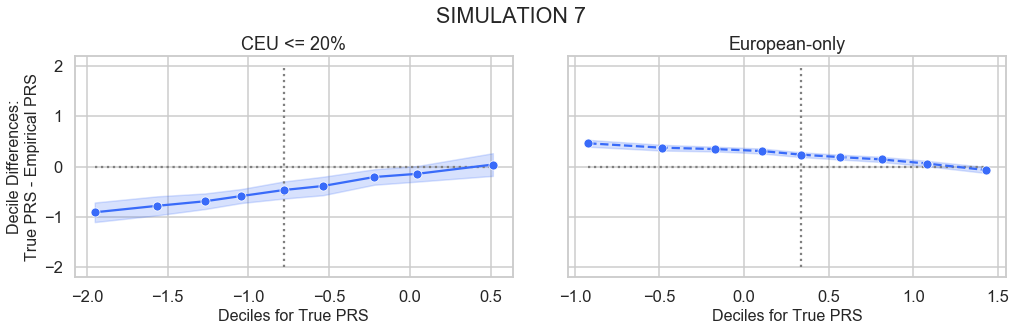

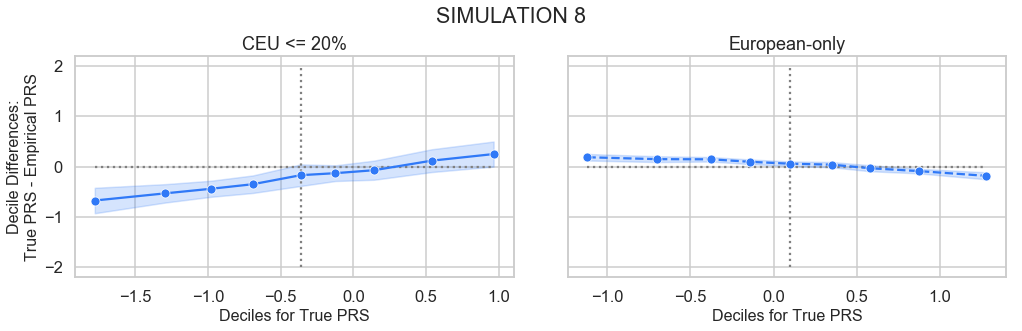

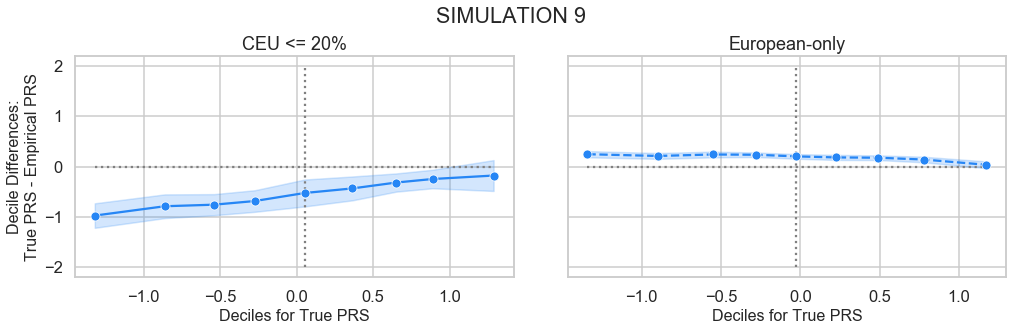

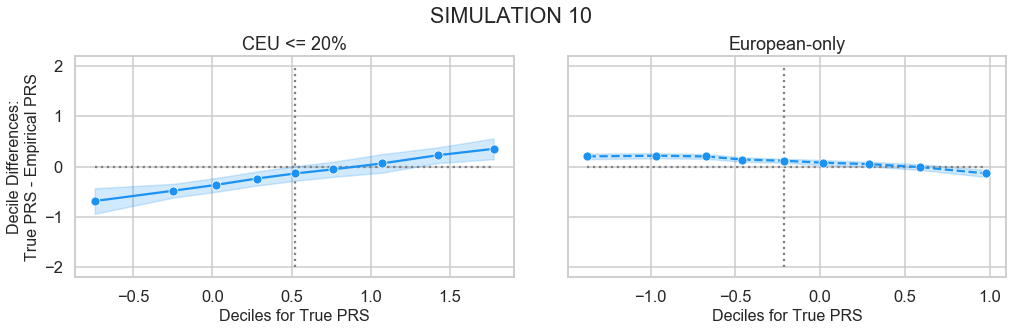

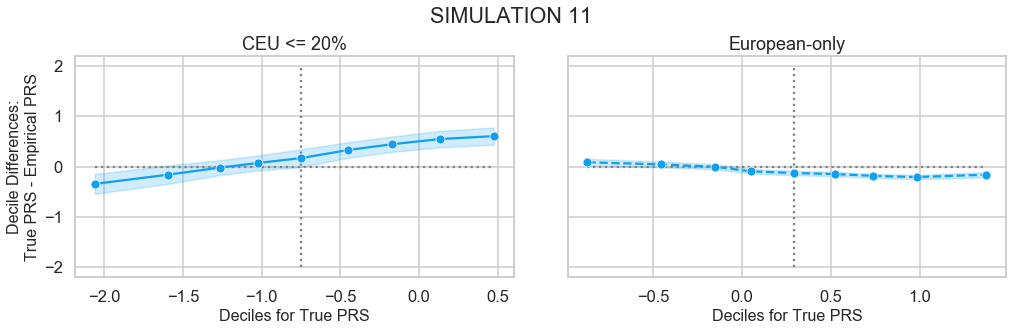

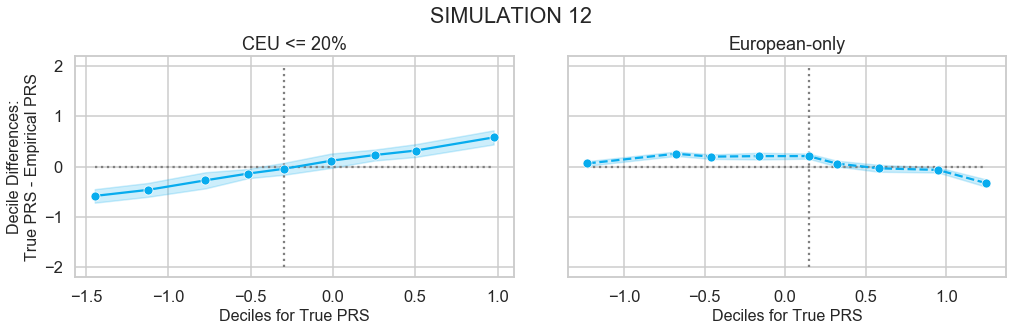

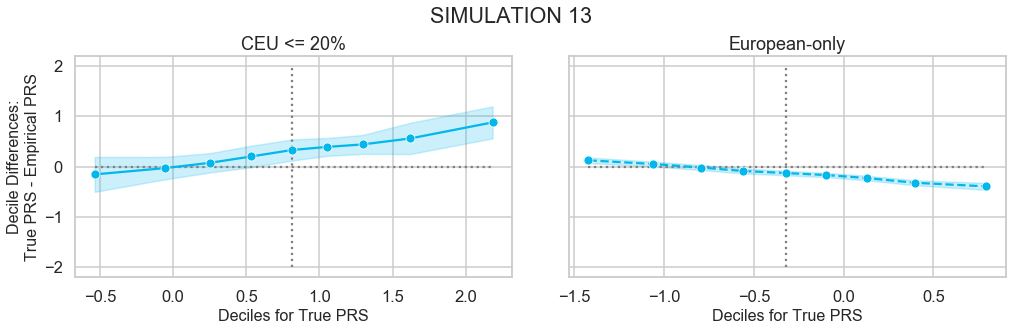

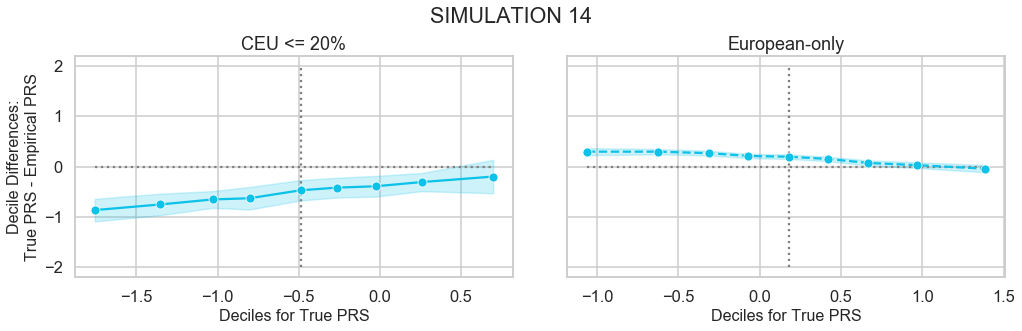

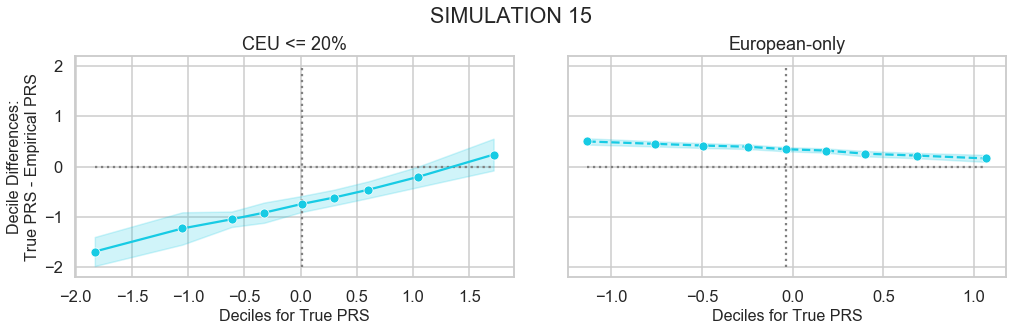

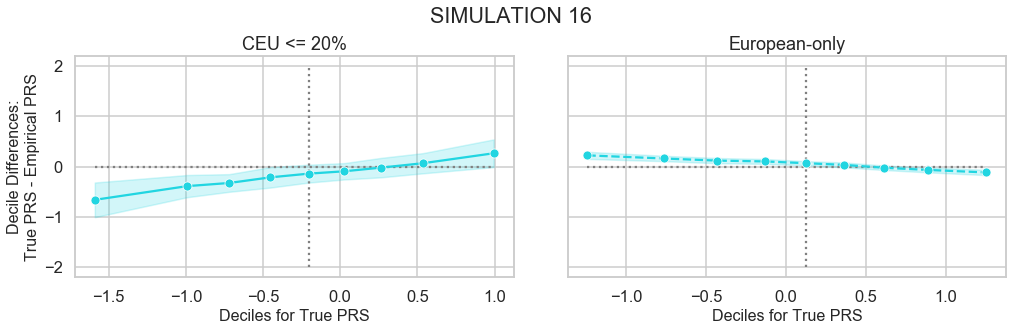

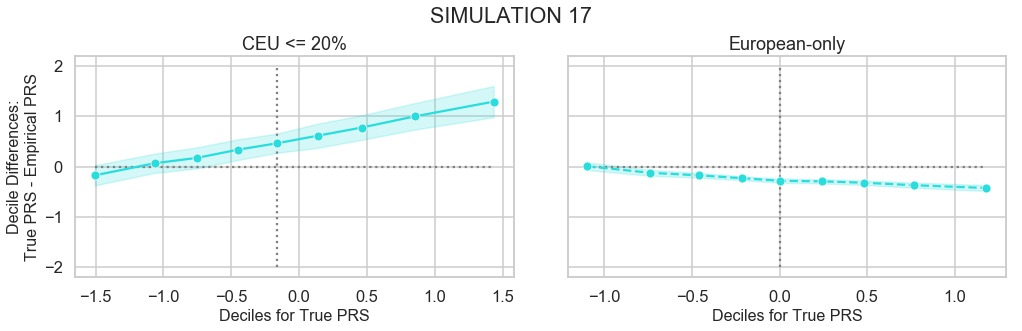

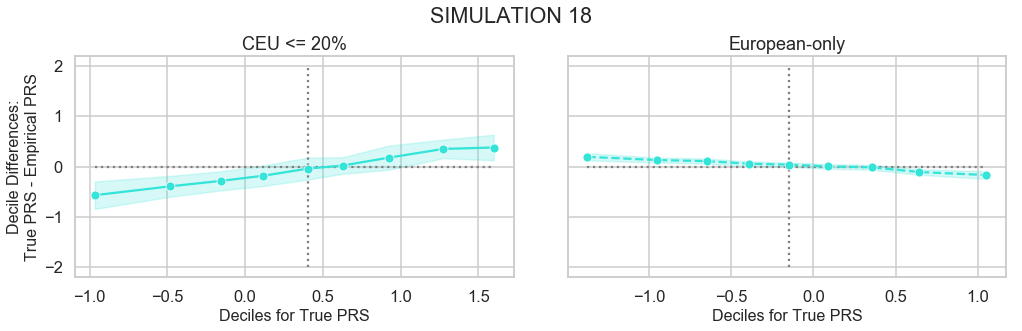

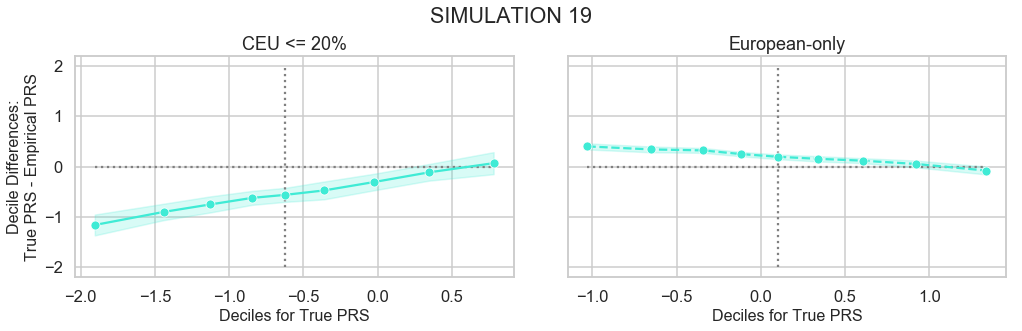

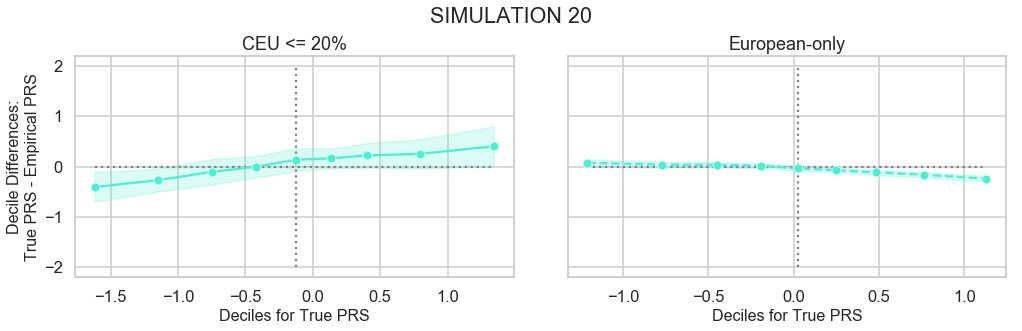

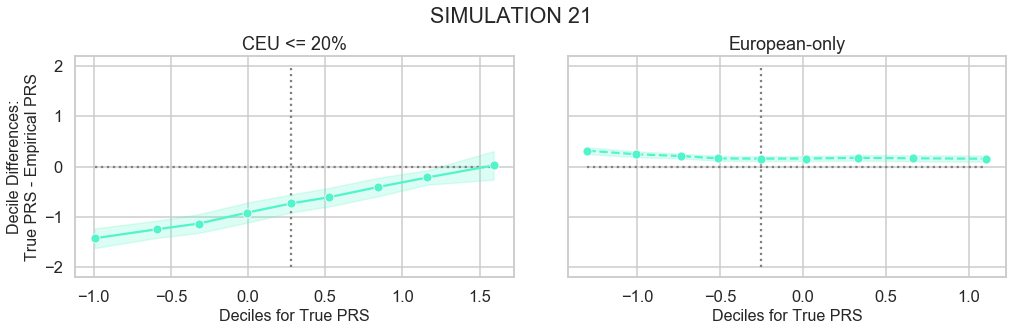

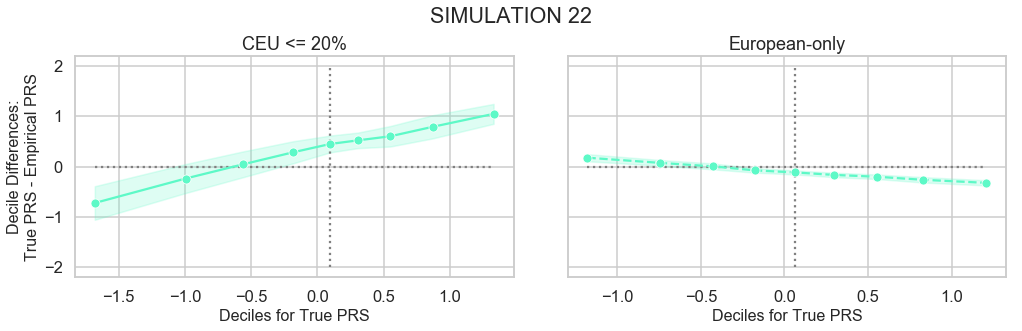

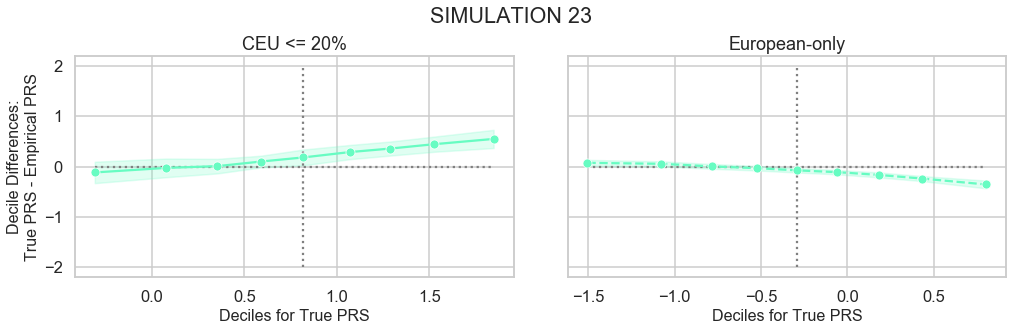

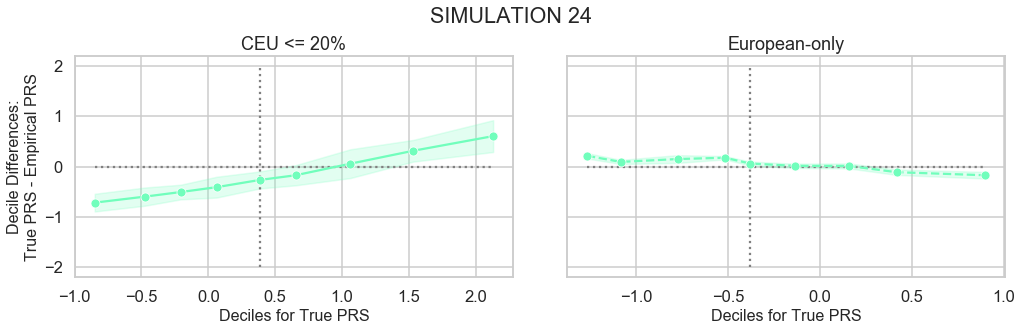

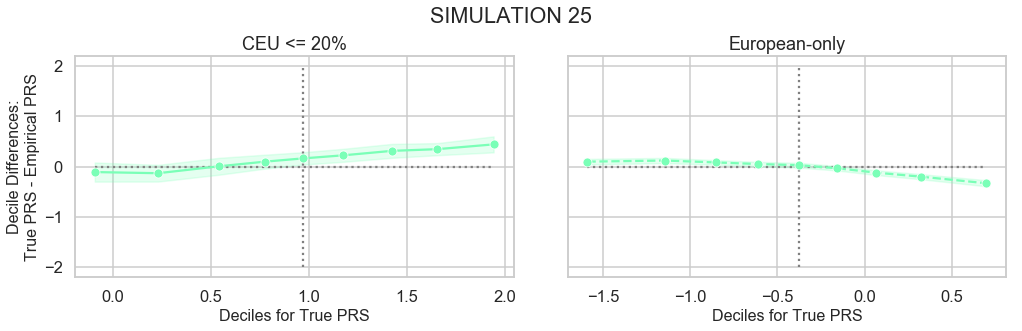

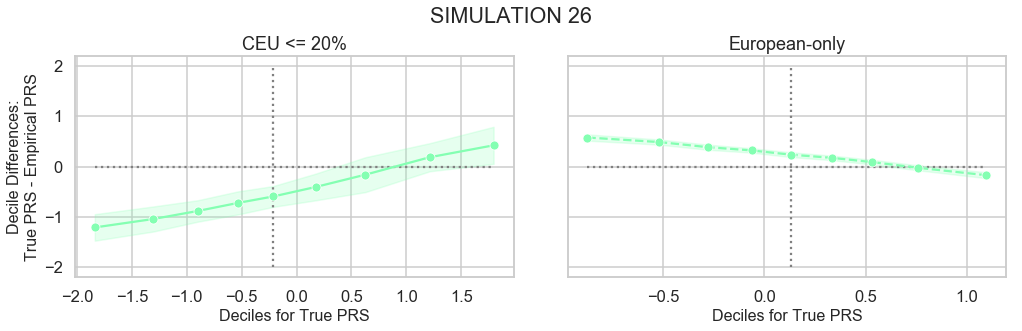

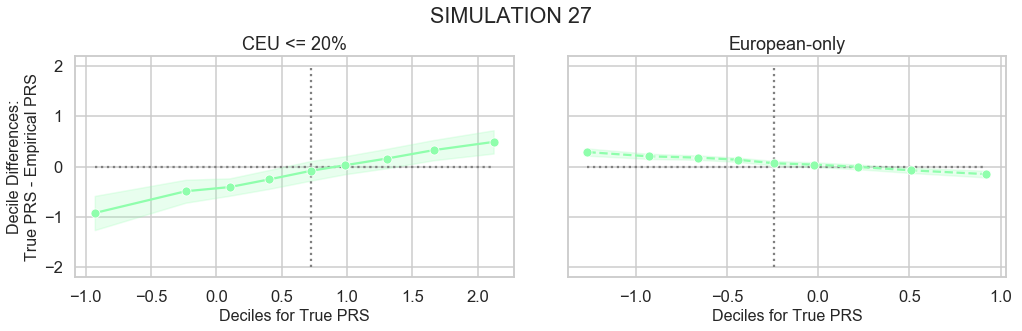

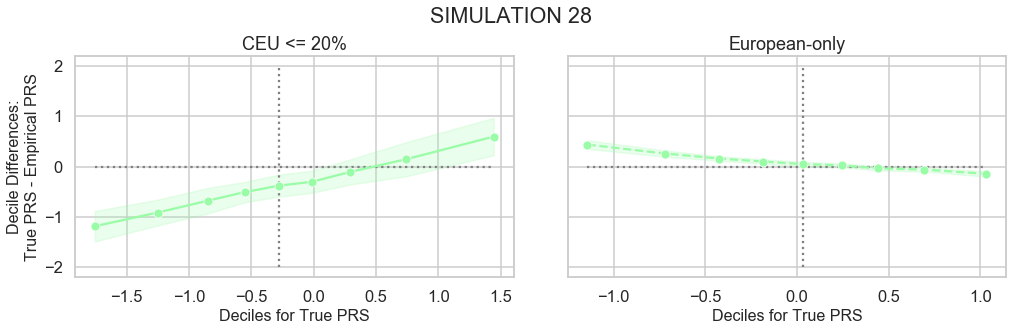

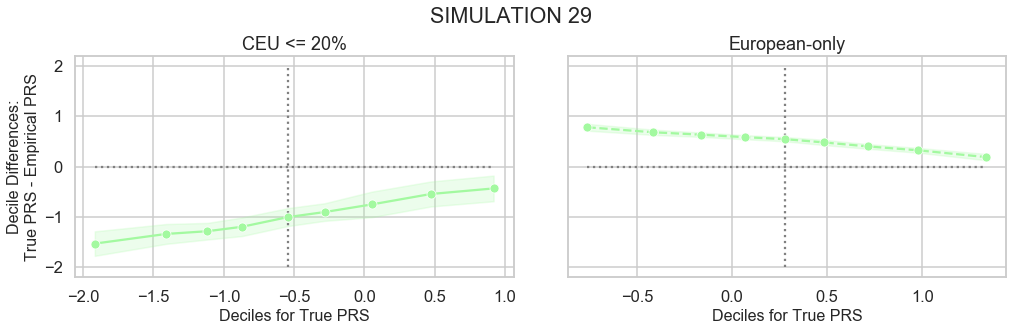

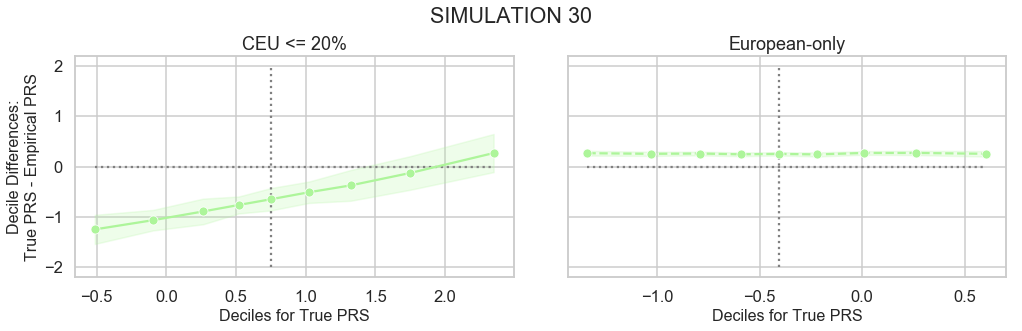

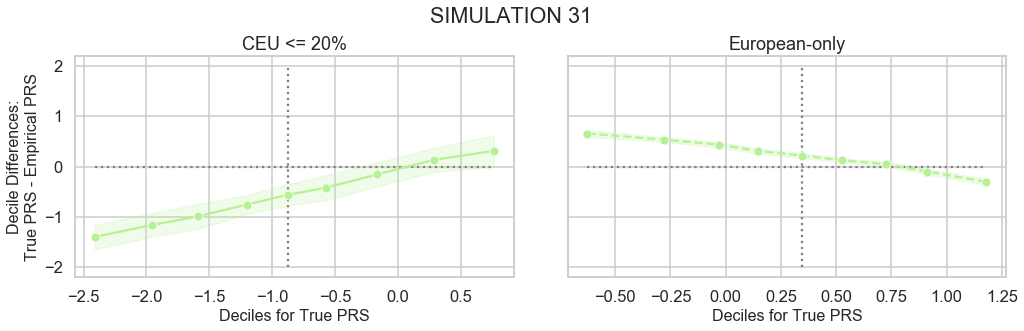

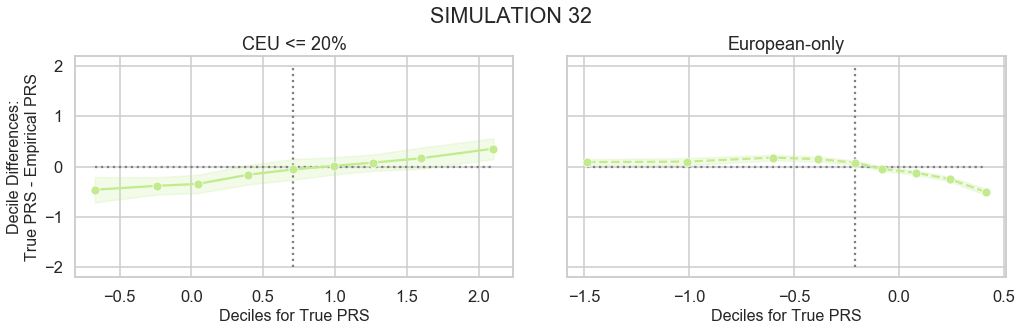

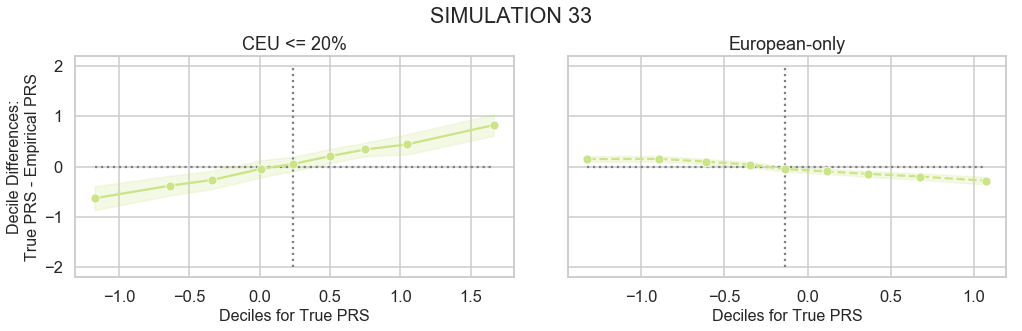

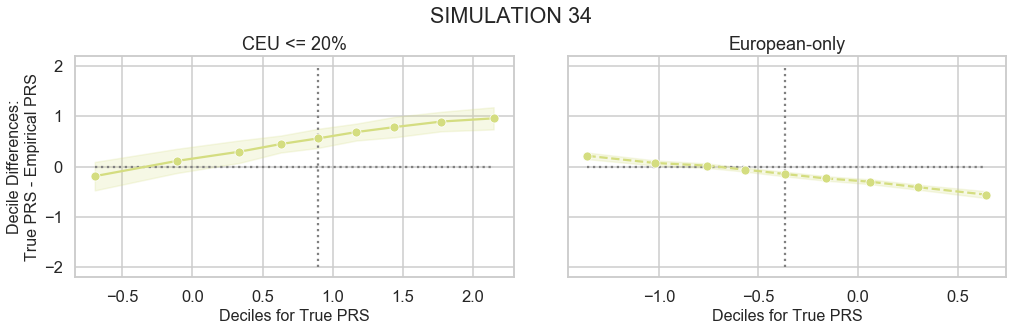

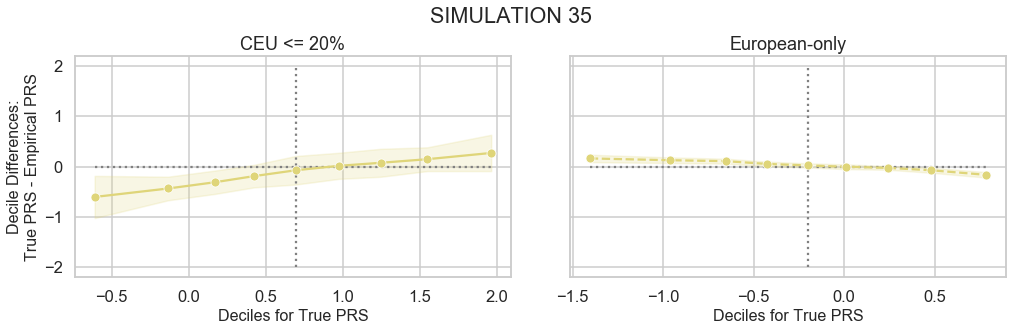

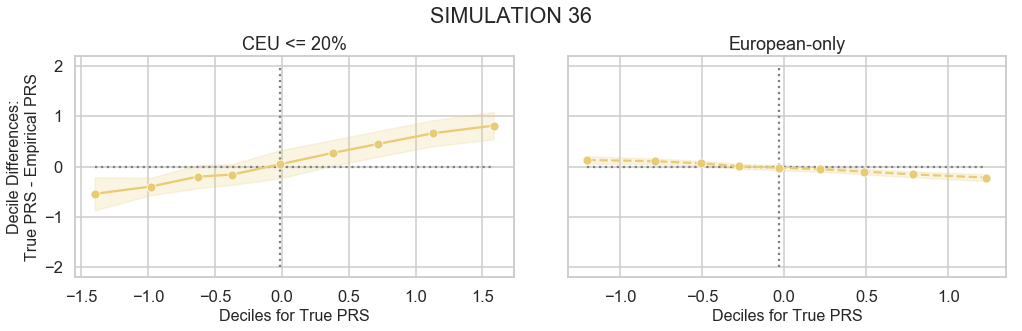

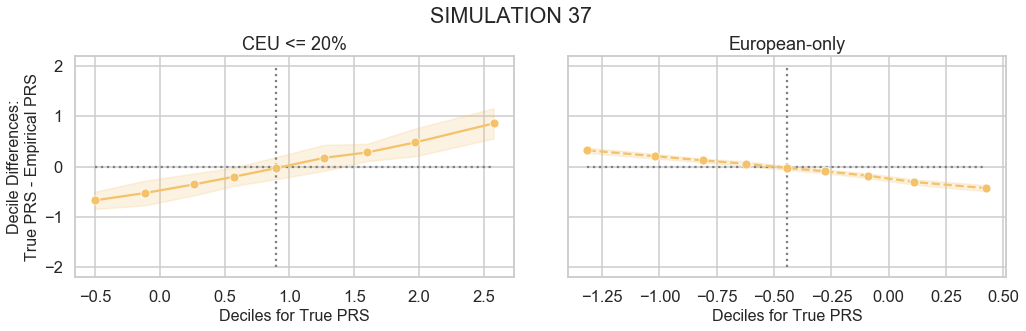

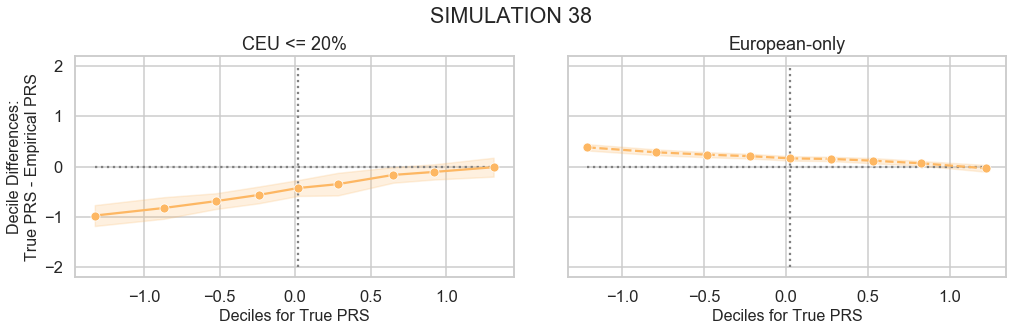

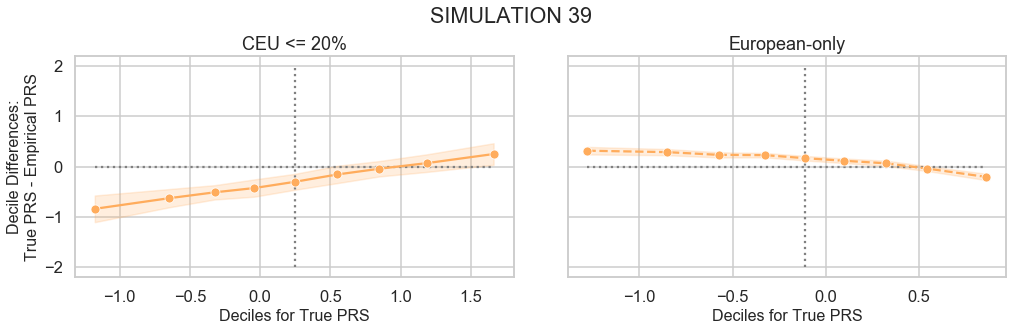

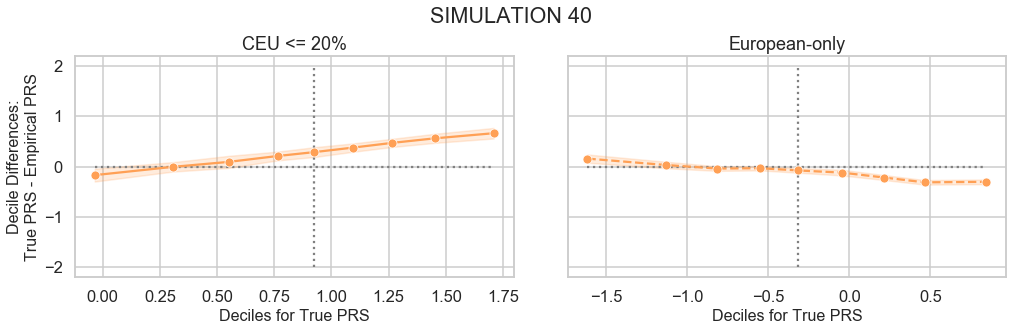

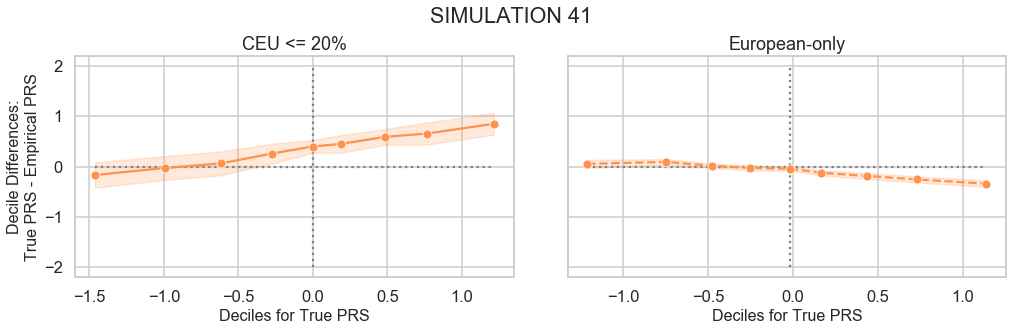

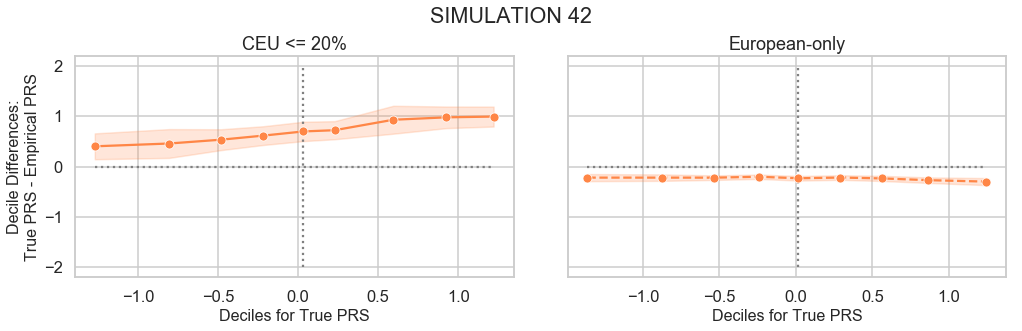

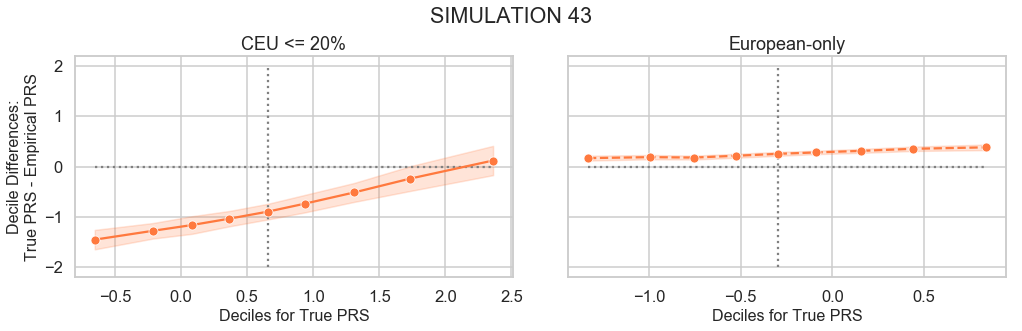

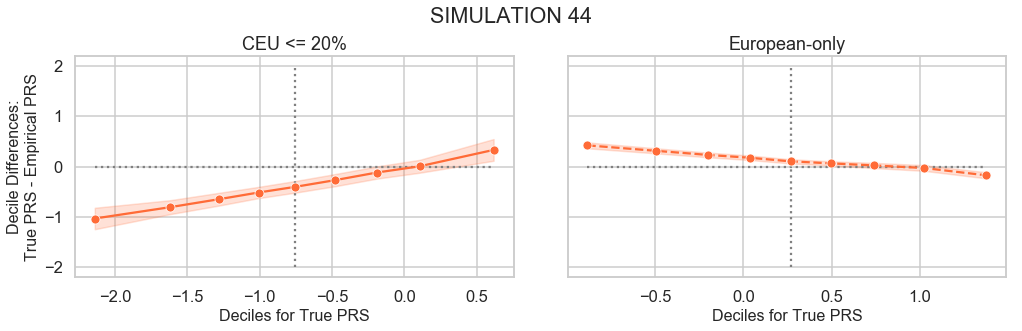

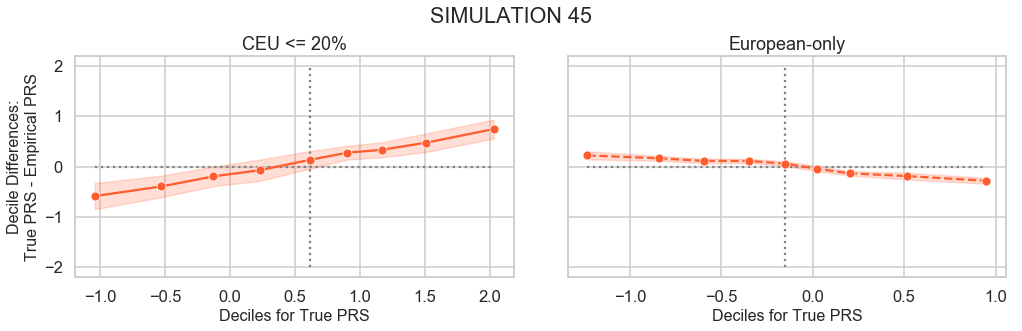

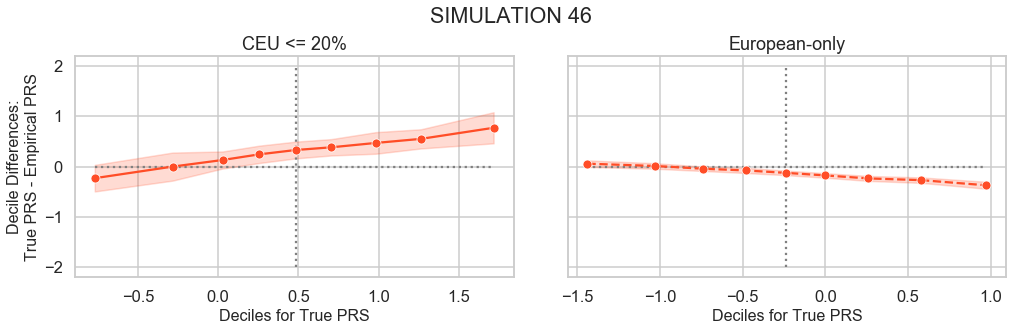

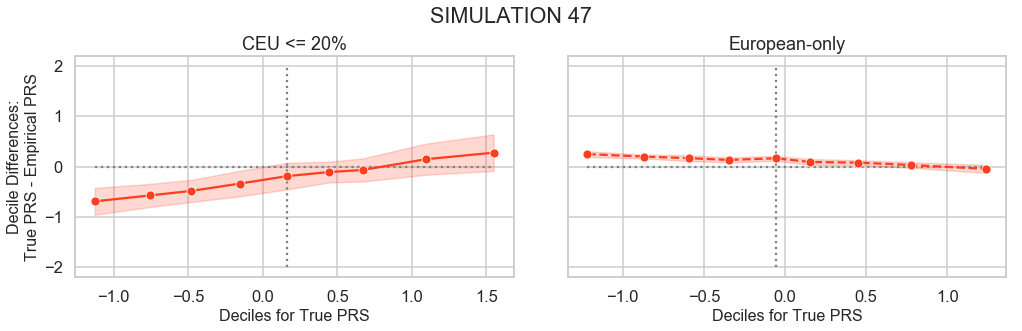

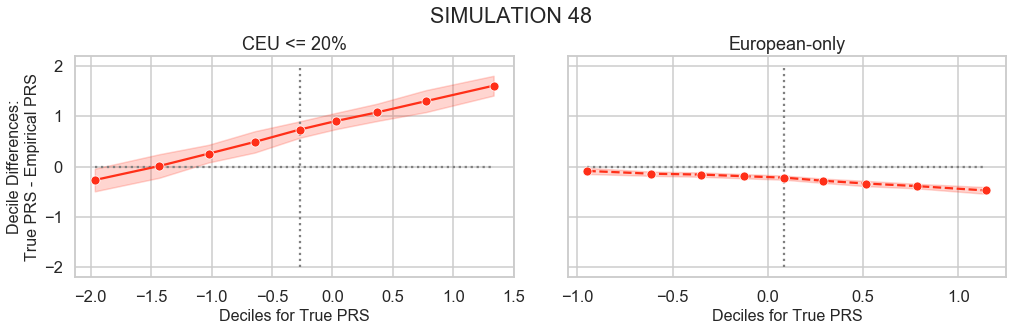

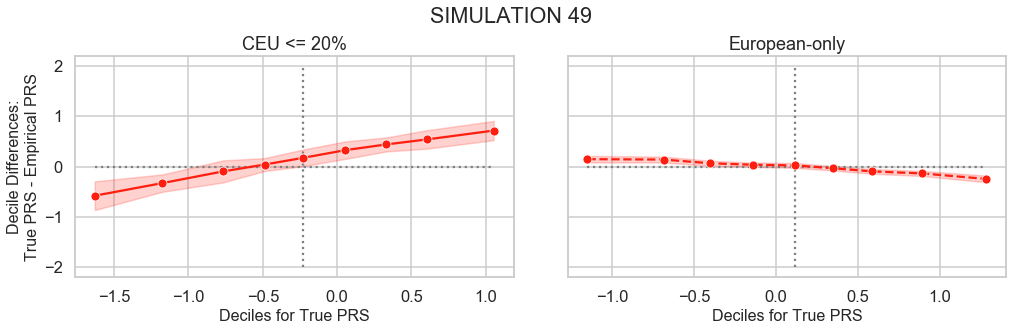

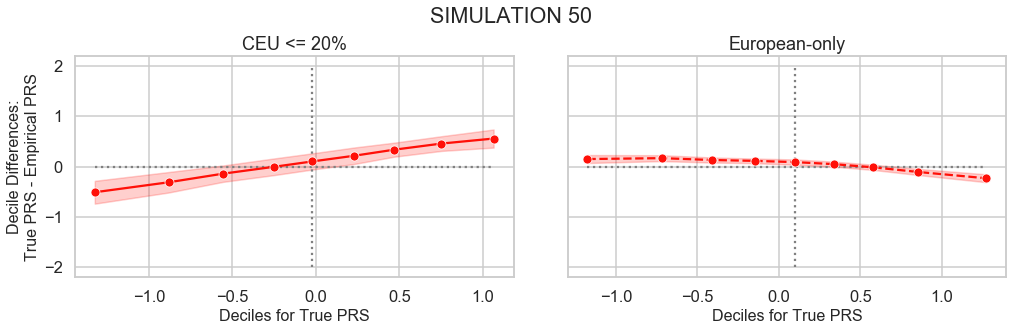

In [12]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/taylorcavazos/Desktop/output.pdf")
for sim in range(1,51): 
    fig, ax = plt.subplots(1,2,sharey=True,figsize=(15,5))
    temp = plot_shift(ax[0],str(sim),data_eur_low,color_pallette[sim-1],"CEU <= 20%")
    temp = plot_shift(ax[1],str(sim),data_eur_only,color_pallette[sim-1],"European-only",linestyle="--")
    fig.suptitle("SIMULATION {}".format(sim))
    fig.tight_layout(pad=2)
    pdf.savefig(fig)
pdf.close()

In [ ]:
data_eur_only["3"]

In [ ]:
med_dif_eur_only = []
med_dif_eur_low = []
for sim in range(1,51):
    med_dif_eur_low.append(data_eur_low[str(sim)].loc[4,"difference"])
    med_dif_eur_only.append(data_eur_only[str(sim)].loc[4,"difference"])

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(med_dif_eur_only,label="European-only")
sns.distplot(med_dif_eur_low,label="CEU <= 20%")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
diff_results = pd.DataFrame(columns=["diff_"+str(i) for i in np.arange(1,10)])
for sim in data_eur_low.keys():
    diff_results.loc[sim,:] = list(data_eur_low.get(sim).loc[:,"difference"])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(diff_results)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [ ]:
plt.scatter(principalDf["PC1"],principalDf.PC2)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(diff_results,"complete")

labelList = range(1, 51)

plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size=20,
            leaf_rotation=90)
plt.show()

# Distance from clumped vars and causal inds

In [ ]:
dfs = []
for f in glob.glob("../results/summary/distances/*"):
    data = pd.read_csv(f,sep="\t",index_col=0)
    dfs.append(data)

In [ ]:
for sim in ["1","7"]:
    sf = sns.lineplot(x="q",y="difference",data=data[sim],markers=True,marker="o")
#         plt.fill_between(x = data[sim]["q"],y1 = data[sim]["ci_lower"], y2 = data[sim]["ci_upper"], alpha=0.2,color=colors[i])
plt.hlines(0,0.1,0.9,color="gray",linestyles="--")
plt.vlines(0.5,-1.5,2,color="gray",linestyles="--")
sns.despine()
plt.show()

In [ ]:
G3

In [ ]:
order_df.sort_values("q_5")

In [ ]:
for df in dfs:
    sns.distplot(df.min()/1000,hist=False,rug=False)
plt.xlabel("Distance (kb)")

plt.show()

# LD Matrix

In [ ]:
glob.glob("../results/summary/linkage/causal*")

In [ ]:
inds = pickle.load(open("../results/summary/linkage/causal_inds_15.pkl","rb"))

In [ ]:
ld_ceu = pickle.load(open("../results/summary/linkage/ceu_ld_15.pkl","rb"))

In [ ]:
ld_yri = pickle.load(open("../results/summary/linkage/yri_ld_15.pkl","rb"))

In [ ]:
ceu_df = pd.DataFrame(index=ld_ceu.keys(),columns=ld_ceu.keys())

In [ ]:
ceu_df.shape

In [ ]:
yri_df = pd.DataFrame(index=ld_yri.keys(),columns=ld_yri.keys())

In [ ]:
yri_df.shape

In [ ]:
#for ind in tqdm.tqdm(inds):
for ind in tqdm.tqdm(ceu_df.index):
    if ld_ceu.get(ind) != None:
        for col in ld_ceu.get(ind).keys():
            ceu_df.loc[ind,col] = ld_ceu.get(ind).get(col)
            ceu_df.loc[col,ind] = ld_ceu.get(ind).get(col)


In [ ]:
temp = ceu_df.loc[(ceu_df>0.2).any(),(ceu_df>0.2).any()]

In [ ]:
np.fill_diagonal(temp.values,1)

In [ ]:
temp

In [ ]:
sns.heatmap(temp,cmap="Blues")
plt.show()

In [ ]:
sns.heatmap(temp,cmap="Blues")
plt.show()

In [ ]:
for ind in tqdm.tqdm(inds):
#for ind in tqdm.tqdm(ceu_df.index):
    if ld_yri.get(ind) != None:
        for col in ld_yri.get(ind).keys():
            ceu_df.loc[ind,col] = ld_yri.get(ind).get(col)
            ceu_df.loc[col,ind] = ld_yri.get(ind).get(col)

In [ ]:
temp = ceu_df.loc[(ceu_df>0.2).any(),(ceu_df>0.2).any()]

In [ ]:
np.fill_diagonal(temp.values,1)